#### Demographic, Economic, and Food Security Variables by DC Ward ####
The following data, tables, and charts help us understand the distribution of demographics (race/ethnicity), household income, and experienced rates of food insecurity across and within DC Wards 1 - 8. Data sources include:
* [Open Data DC: ACS Demographic Characteristics DC Ward, 2022](https://opendata.dc.gov/datasets/DCGIS::acs-demographic-characteristics-dc-ward/explore?location=38.893613%2C-77.014562%2C12.00)
* [Open Data DC: ACS Economic Characteristics DC Ward, 2022](https://opendata.dc.gov/datasets/DCGIS::acs-economic-characteristics-dc-ward/explore?location=38.890603%2C-77.031102%2C12.00)
* [Open Data DC: Low Food Access Areas, 2018](https://opendata.dc.gov/datasets/DCGIS::low-food-access-areas/explore?location=38.890899%2C-77.026467%2C12.53)

Let's begin by importing the relevant libraries for data exploration and analysis.

In [1]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

**Race and Ethnicity**: We will first start by cleaning and exploring a dataset for demographic characteristics to understand how race and ethnicity is distributed within and across wards. The variable 'demog' will represent this imported dataset. We will upload the following csv file:

In [2]:
demog = pd.read_csv('datasets/ACS_Demographic_Characteristics_DC_Ward.csv')

In [3]:
demog.head(1)

OBJECTID  STATEFP  SLDUST  GEOID NAMELSAD     ALAND   AWATER  INTPTLAT  \
0         1       11       2  11002   Ward 2  16573627  5928027  38.89262   

    INTPTLON                          NAME  ...  DP05_0083E  DP05_0084E  \
0 -77.042742  Ward 2, District of Columbia  ...        2358         749   

   DP05_0085E  DP05_0086E  DP05_0087E  DP05_0088E  DP05_0089E  \
0        1609       43859       64742       31492       33250   

                      GIS_ID  SHAPEAREA  SHAPELEN  
0  ACS_Demographic_DC_Ward_2          0         0  

[1 rows x 102 columns]

The dataset as-is looks pretty confusing! Using the available [data dictionary](https://opendata.dc.gov/datasets/DCGIS::acs-demographic-characteristics-dc-ward/about), we will clean this data by renaming relevant columns for race and ethnicity, then create a subset of trimmed data so that our new dataset is more clearly described and easier to navigate. 

In [4]:
# rename race/ethnicity and ward columns
demog.rename(columns={'NAMELSAD':'WARD'}, inplace=True),
demog.rename(columns={'DP05_0033E':'Total Pop'}, inplace=True),
demog.rename(columns={'DP05_0077E':'White'}, inplace=True),
demog.rename(columns={'DP05_0078E':'Black'}, inplace=True),
demog.rename(columns={'DP05_0079E':'American Indian and Alaska Native'}, inplace=True),
demog.rename(columns={'DP05_0080E':'Asian'}, inplace=True),
demog.rename(columns={'DP05_0081E':'Native Hawaiian and Pacific Islander'}, inplace=True),
demog.rename(columns={'DP05_0082E':'Other'}, inplace=True),
demog.rename(columns={'DP05_0083E':'Two or More Races'}, inplace=True),
demog.rename(columns={'DP05_0071E':'Hispanic or Latino'}, inplace=True),
demog.tail(1)

OBJECTID  STATEFP  SLDUST  GEOID    WARD     ALAND   AWATER  INTPTLAT  \
7         8       11       3  11003  Ward 3  26946477  1316331   38.9383   

   INTPTLON                          NAME  ...  Two or More Races  DP05_0084E  \
7 -77.07814  Ward 3, District of Columbia  ...               2980          92   

   DP05_0085E  DP05_0086E  DP05_0087E  DP05_0088E  DP05_0089E  \
7        2888       40711       63600       28276       35324   

                      GIS_ID  SHAPEAREA  SHAPELEN  
7  ACS_Demographic_DC_Ward_3          0         0  

[1 rows x 102 columns]

In [5]:
# create a subset and new variable for trimmed data
demog_columns_to_keep = ['WARD','Total Pop','White','Black','American Indian and Alaska Native','Asian','Native Hawaiian and Pacific Islander','Other','Two or More Races','Hispanic or Latino']

In [6]:
demog_trimmed = demog[demog_columns_to_keep].copy()
demog_trimmed = demog_trimmed.dropna()
demog_trimmed

WARD  Total Pop  White  Black  American Indian and Alaska Native  Asian  \
0  Ward 2      77923  51495   6174                                117   7486   
1  Ward 8      85564   5051  73562                                 89    393   
2  Ward 6     101882  57364  28269                                157   4807   
3  Ward 4      90300  21268  43664                                 96   1753   
4  Ward 5      92094  20759  56443                                225   2375   
5  Ward 7      84271   2281  76009                                302    323   
6  Ward 1      85289  39958  21672                                162   4833   
7  Ward 3      84651  59616   6868                                150   6377   

   Native Hawaiian and Pacific Islander  Other  Two or More Races  \
0                                    96    183               2358   
1                                     5    724               2195   
2                                     8    272               3060   
3                                     0    591               2597   
4                                    85    316               2302   
5                                    13    466               1484   
6                                    20    564               3071   
7                                    56    449               2980   

   Hispanic or Latino  
0               10014  
1                3545  
2                7945  
3               20331  
4                9589  
5                3393  
6               15009  
7                8155

In [7]:
demog_trimmed.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   WARD                                  8 non-null      object
 1   Total Pop                             8 non-null      int64 
 2   White                                 8 non-null      int64 
 3   Black                                 8 non-null      int64 
 4   American Indian and Alaska Native     8 non-null      int64 
 5   Asian                                 8 non-null      int64 
 6   Native Hawaiian and Pacific Islander  8 non-null      int64 
 7   Other                                 8 non-null      int64 
 8   Two or More Races                     8 non-null      int64 
 9   Hispanic or Latino                    8 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 768.0+ bytes


Great! Now we have a more streamlined dataset to work with. Before generating charts, we will also sort the wards in ascending order so that it will make a bit more visual sense when charting.

In [8]:
demog_trimmed_ward = demog_trimmed.sort_values(by='WARD',ascending=True)
demog_trimmed_ward.head(10)

WARD  Total Pop  White  Black  American Indian and Alaska Native  Asian  \
6  Ward 1      85289  39958  21672                                162   4833   
0  Ward 2      77923  51495   6174                                117   7486   
7  Ward 3      84651  59616   6868                                150   6377   
3  Ward 4      90300  21268  43664                                 96   1753   
4  Ward 5      92094  20759  56443                                225   2375   
2  Ward 6     101882  57364  28269                                157   4807   
5  Ward 7      84271   2281  76009                                302    323   
1  Ward 8      85564   5051  73562                                 89    393   

   Native Hawaiian and Pacific Islander  Other  Two or More Races  \
6                                    20    564               3071   
0                                    96    183               2358   
7                                    56    449               2980   
3                                     0    591               2597   
4                                    85    316               2302   
2                                     8    272               3060   
5                                    13    466               1484   
1                                     5    724               2195   

   Hispanic or Latino  
6               15009  
0               10014  
7                8155  
3               20331  
4                9589  
2                7945  
5                3393  
1                3545

Now let's make some bar charts using our trimmed and sorted variable for race and ethnicity. We'll start by generating one chart per the following race and ethnicity categories: White, Black, American Indian and Alaska Native, Asian, Native Hawaiian and Pacific Islander, and Latino. This is just to help us visualize what the individual counts may look like.

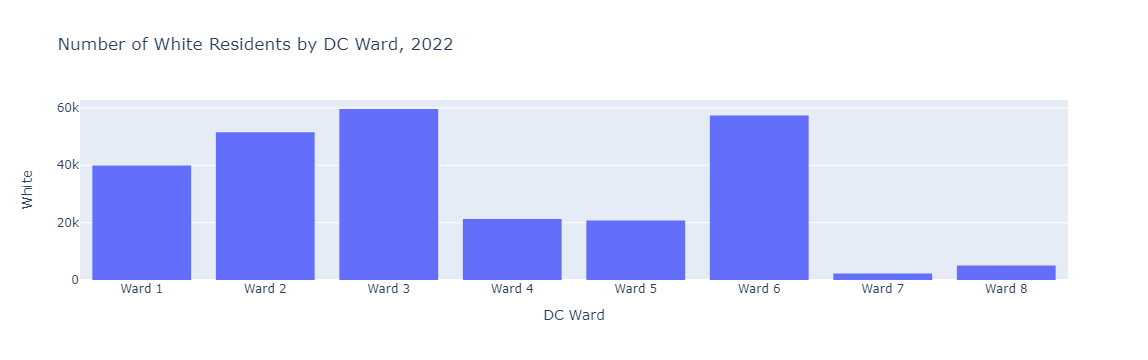

In [9]:
fig = px.bar(demog_trimmed_ward,
             x='WARD',
             y='White',
             title='Number of White Residents by DC Ward, 2022',
             labels={
                 'WARD':'DC Ward'
             }
            )
fig.update_traces(marker_line_width=0)
fig.show()

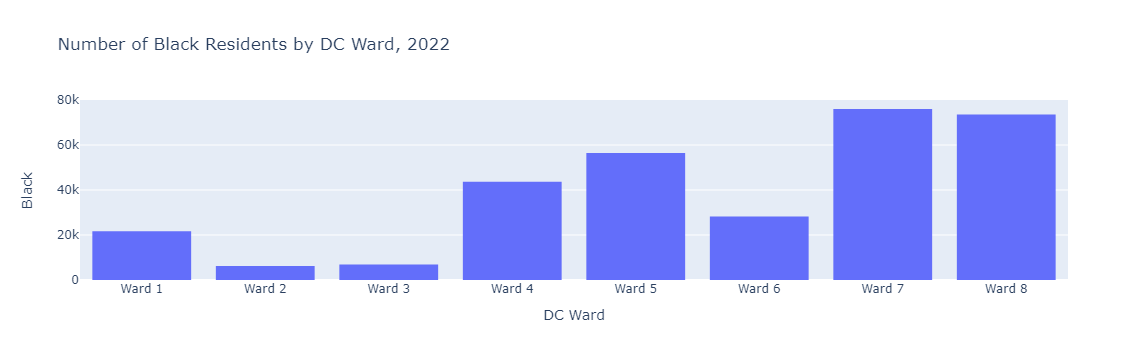

In [10]:
fig = px.bar(demog_trimmed_ward,
             x='WARD',
             y='Black',
             title='Number of Black Residents by DC Ward, 2022',
             labels={
                 'WARD':'DC Ward'
             }
            )
fig.update_traces(marker_line_width=0)
fig.show()

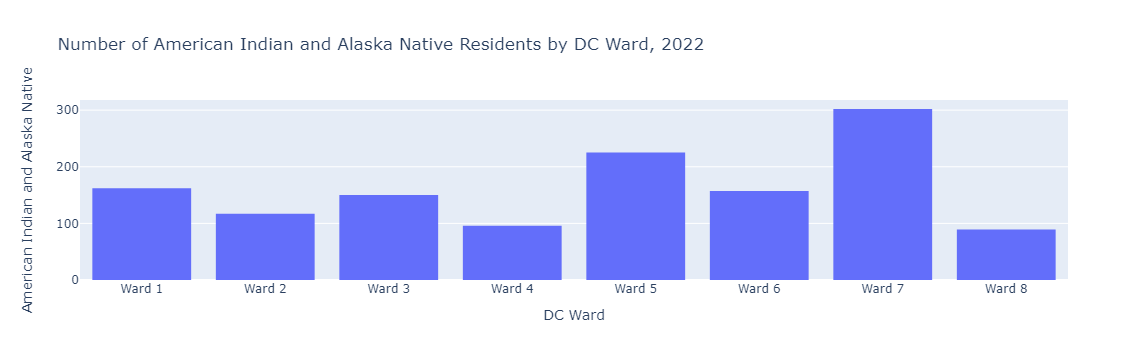

In [11]:
fig = px.bar(demog_trimmed_ward,
             x='WARD',
             y='American Indian and Alaska Native',
             title='Number of American Indian and Alaska Native Residents by DC Ward, 2022',
             labels={
                 'WARD':'DC Ward'
             }
            )
fig.update_traces(marker_line_width=0)
fig.show()

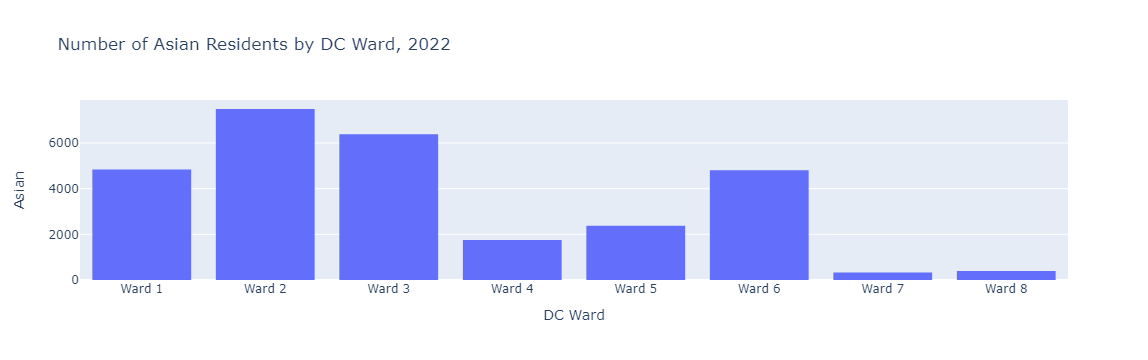

In [12]:
fig = px.bar(demog_trimmed_ward,
             x='WARD',
             y='Asian',
             title='Number of Asian Residents by DC Ward, 2022',
             labels={
                 'WARD':'DC Ward'
             }
            )
fig.update_traces(marker_line_width=0)
fig.show()

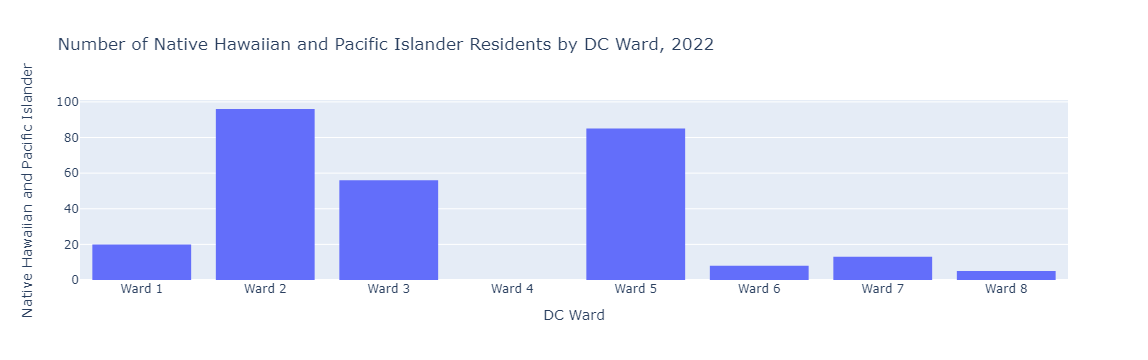

In [13]:
fig = px.bar(demog_trimmed_ward,
             x='WARD',
             y='Native Hawaiian and Pacific Islander',
             title='Number of Native Hawaiian and Pacific Islander Residents by DC Ward, 2022',
             labels={
                 'WARD':'DC Ward'
             }
            )
fig.update_traces(marker_line_width=0)
fig.show()

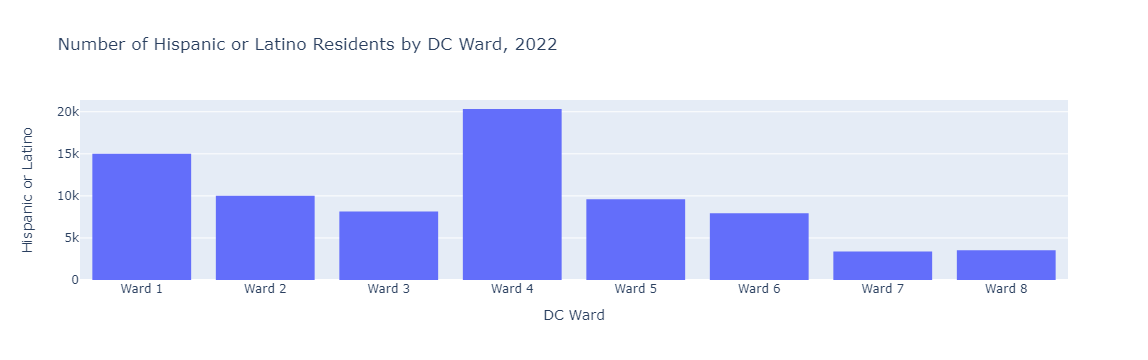

In [14]:
fig = px.bar(demog_trimmed_ward,
             x='WARD',
             y='Hispanic or Latino',
             title='Number of Hispanic or Latino Residents by DC Ward, 2022',
             labels={
                 'WARD':'DC Ward'
             }
            )
fig.update_traces(marker_line_width=0)
fig.show()

Great! Now we have individual charts per race and ethnicity category, broken down by ward. To draw better comparisons of demographic distribution across and within wards, let's create a stacked chart. Essentially, we want to see what each ward's race and ethnicity distribution looks like all in one visual. However, our trimmed and sorted dataset is giving some trouble in creating any sort of grouped variable. Our workaround includes manually reformatting our trimmed and sorted dataset in a way that would allow us to chart the number of residents per ward, color-coded by race and ethnicity. We created a separate spreadsheet, manually entered the data, and re-uploaded the following:

In [15]:
stack = pd.read_csv('datasets/demog_trimmed_stacked.csv')

In [16]:
stack.head(10)

Ward                    Race and Ethnicity  Count
0     2                                 White  51495
1     2                                 Black   6174
2     2                    Hispanic or Latino  10014
3     2                                 Asian   7486
4     2     American Indian and Alaska Native    117
5     2  Native Hawaiian and Pacific Islander     96
6     2                                 Other    183
7     2                     Two or more Races   2358
8     8                                 White   5051
9     8                                 Black  73562

Now that the data frame has been adjusted (see above), we can create a bar chart where the x-axis represents the ward, the y-axis represents the population count, and the bars can be color-coded by race and ethnicity. Let's create the chart.

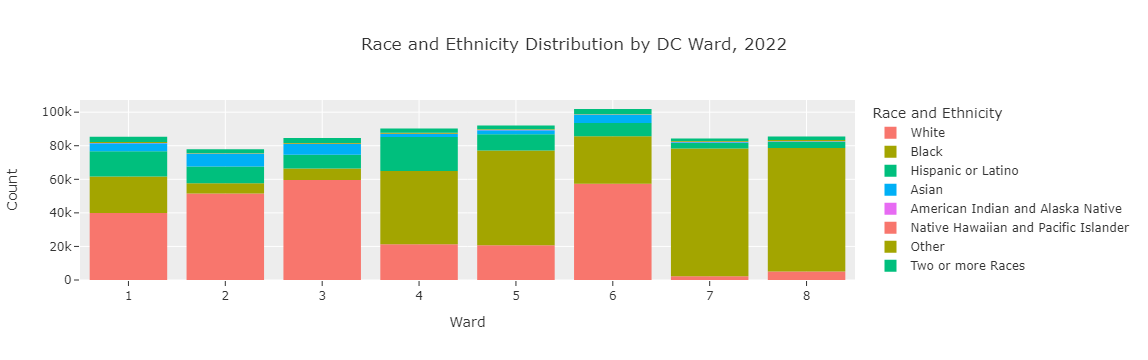

In [17]:
fig = px.bar(stack,
             x='Ward',
             y='Count',
             color='Race and Ethnicity',
             title='Race and Ethnicity Distribution by DC Ward, 2022',
             template='ggplot2'
            )
fig.update_traces(marker_line_width=0)
fig.show()

This is what we were looking for! Now, we can see how race and ethnicity is distributed within each ward and in comparison with one another, all in the same chart. Perhaps the most stark observation is the distribution between White and Black DC residents by ward. In Wards 1, 2, and 3, there is a disproportionately higher count of White residents whereas in Wards 7 and 8, there is a disproportionately higher count of Black residents. On our subsequent maps, we can see how there is a distinct geographic divide between White and Black residents. Here, we can see a relative distribution of residents by race and ethnicity, with clear distinctions between Black and White residents. This could be a preliminary indicator of racialized spatial segregation.

**Household Income**: Let's now conduct some data exploration, cleaning, and visualization for median household income. We will start by importing the relevant dataset, then conducting some cleaning.

In [18]:
income = pd.read_csv('datasets/ACS_Economic_Characteristics_DC_Ward.csv')

In [19]:
income.head(2)

OBJECTID  STATEFP  SLDUST  GEOID NAMELSAD     ALAND   AWATER   INTPTLAT  \
0         1       11       2  11002   Ward 2  16573627  5928027  38.892620   
1         2       11       8  11008   Ward 8  22429470  8473345  38.839014   

    INTPTLON                          NAME  ...  DP03_0130P  DP03_0131P  \
0 -77.042742  Ward 2, District of Columbia  ...         7.4         5.9   
1 -77.007126  Ward 8, District of Columbia  ...        39.5        36.8   

   DP03_0132P  DP03_0133P  DP03_0134P  DP03_0135P  DP03_0136P  DP03_0137P  \
0         9.5        13.6        14.2        10.2         3.5        18.6   
1        40.9        26.3        26.4        25.5        29.0        34.7   

   SHAPEAREA  SHAPELEN  
0          0         0  
1          0         0  

[2 rows x 149 columns]

Again, lots of confusing labels! Let's create a trimmed dataset that will allow us to look at median household income by ward. Using the available [data dictionary](https://opendata.dc.gov/datasets/DCGIS::acs-economic-characteristics-dc-ward/about), we can start by renaming relevant columns for clarity.

In [20]:
income.rename(columns={'NAMELSAD':'WARD'}, inplace=True),
income.rename(columns={'DP03_0051':'Total Households'}, inplace=True),
income.rename(columns={'DP03_0086':'Median Household Income'}, inplace=True),
income.tail(1)

OBJECTID  STATEFP  SLDUST  GEOID    WARD     ALAND   AWATER  INTPTLAT  \
7         8       11       3  11003  Ward 3  26946477  1316331   38.9383   

   INTPTLON                          NAME  ...  DP03_0130P  DP03_0131P  \
7 -77.07814  Ward 3, District of Columbia  ...         1.6         1.1   

   DP03_0132P  DP03_0133P  DP03_0134P  DP03_0135P  DP03_0136P  DP03_0137P  \
7         1.8         9.3        10.4         5.4         2.1        17.9   

   SHAPEAREA  SHAPELEN  
7          0         0  

[1 rows x 149 columns]

Let's now create a subset of the data with the following categories: Ward, Total Households, and Median Household Income. We'll identify these columns to keep and drop all others.

In [21]:
income_columns_keep=['WARD','Total Households','Median Household Income']

In [22]:
income_trimmed=income[income_columns_keep].copy()
income_trimmed=income_trimmed.dropna()
income_trimmed.head(3)

WARD  Total Households  Median Household Income
0  Ward 2             38857                   212937
1  Ward 8             32194                    43617
2  Ward 6             47369                   169889

In [23]:
income_trimmed.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   WARD                     8 non-null      object
 1   Total Households         8 non-null      int64 
 2   Median Household Income  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


Like was done previously, we'll also sort the data so that the wards are listed in ascending order. This will just help with visual clarity.

In [24]:
income_trimmed_ward = income_trimmed.sort_values(by='WARD',ascending=True)
income_trimmed_ward.head(10)

WARD  Total Households  Median Household Income
6  Ward 1             36362                   156250
0  Ward 2             38857                   212937
7  Ward 3             37508                   236960
3  Ward 4             31412                   128064
4  Ward 5             34664                   100981
2  Ward 6             47369                   169889
5  Ward 7             29941                    56669
1  Ward 8             32194                    43617

Now that we have our trimmed and sorted variable for income, let's chart it! We want to create a visual that shows median household income by ward.

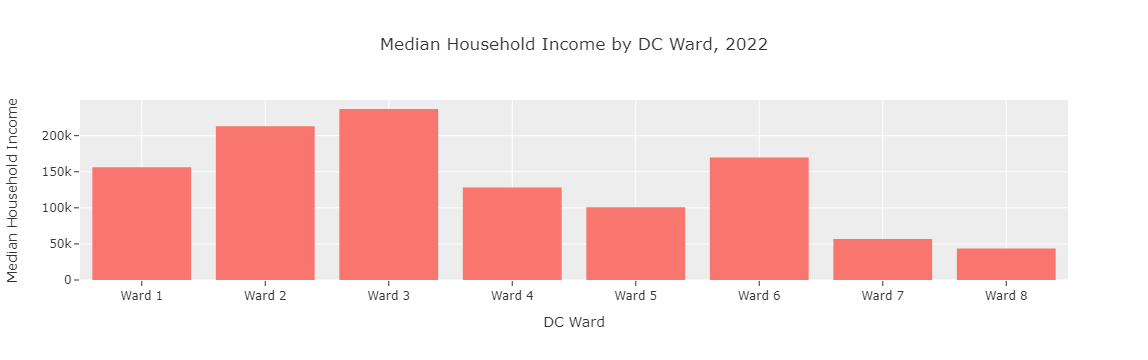

In [25]:
fig = px.bar(income_trimmed_ward,
             x='WARD',
             y='Median Household Income',
             title='Median Household Income by DC Ward, 2022',
             labels={
                 'WARD':'DC Ward'
             },
             template='ggplot2'
            )
fig.update_traces(marker_line_width=0)
fig.show()

This chart is an indicator that the wards with the highest median household income are Wards 2 and 3, with Ward 3 residents' median household income surpassing two hundered thousand dollars. In stark comparison, Wards 7 and 8 have the lowest median household income, with Ward 8 residents' median household income falling below fifty thousand dollars, making the absolute difference in median household income per ward around one hundred and fifty thousand dollars.

Based on the various charts generated here, we have a better understanding of what the population characteristics of each ward are. We are observing that some of the wealthier wards also have more White residents whereas some of the poorer wards also have more Black residents. In subsequent maps and coding, we'll explore whether there is a relationship between these population characteristics and the food environment.

**Food Access and Security**: Let's now conduct some data exploration, cleaning, and visualization for low food access areas. [In this dataset](https://opendata.dc.gov/datasets/DCGIS::low-food-access-areas/about), low food access areas are defined as those where "it is estimated to take more than a ten minute walk to access a full-service grocery store," and food insecurity is defined by those living in a low food access area and having a houshold income 185% lower than the Federal Poverty Line. We'll start by importing the relevant dataset and then conducting some cleaning. 

In [26]:
# import food access data as a geojson for mapping
gdf_access = gpd.read_file('datasets/Low_Food_Access_Areas.geojson')

In [28]:
# check data
gdf_access.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       381 non-null    int64   
 1   FID_GROCER     381 non-null    int64   
 2   FID_GROC_1     381 non-null    int64   
 3   FACILITYID     381 non-null    int64   
 4   FID_POV_AC     381 non-null    int64   
 5   GEOID          381 non-null    object  
 6   FIRST_TOTA     381 non-null    int64   
 7   FIRST_UNDE     381 non-null    int64   
 8   FIRST_OVER     381 non-null    int64   
 9   POPAREA        381 non-null    float64 
 10  SHAPE_LENG     381 non-null    float64 
 11  PARTPOP        381 non-null    int64   
 12  PARTUNDER1     381 non-null    int64   
 13  PARTOVER18     381 non-null    int64   
 14  PARTAREA       381 non-null    float64 
 15  AREARATIO      381 non-null    float64 
 16  GROCERYACC     381 non-null    object  
 17  FID_WARDPL     381 non-null

Based on the available [data dictionary](https://opendata.dc.gov/datasets/DCGIS::low-food-access-areas/about), we want to trim and rename select columns to concentrate only on geographic boundary (ward) and food access and insecurity variables, as well as the geometry for mapping.

In [29]:
# trim for only necessary columns
gdf_access = gdf_access[['WARD','PARTPOP2','PRTOVR185','PRTUND185','PERCENTUND185','geometry']]

In [30]:
# rename
gdf_access.rename(columns={'PARTPOP2':'Total Population',
                       'PRTOVR185':'Income Above FPL',
                       'PRTUND185':'Income Below FPL',
                       'PERCENTUND185':'Percent Food Insecure'                       
                      }, inplace=True)
gdf_access.tail(1)

WARD  Total Population  Income Above FPL  Income Below FPL  \
380     8              2171               947              1224   

     Percent Food Insecure                                           geometry  
380               0.563796  POLYGON ((-77.01156 38.82283, -77.01155 38.822...

Great, we now have a cleaned dataset that includes the Ward number, total population by Ward, income level corresponding to the federal poverty line, rate of food insecurity, and geometry for mapping. Let's do a preliminary static map to see how low food access areas are distributed across DC.

In [31]:
# map access
# get layer into web mercator
gdf_access = gdf_access.to_crs(epsg=3857)

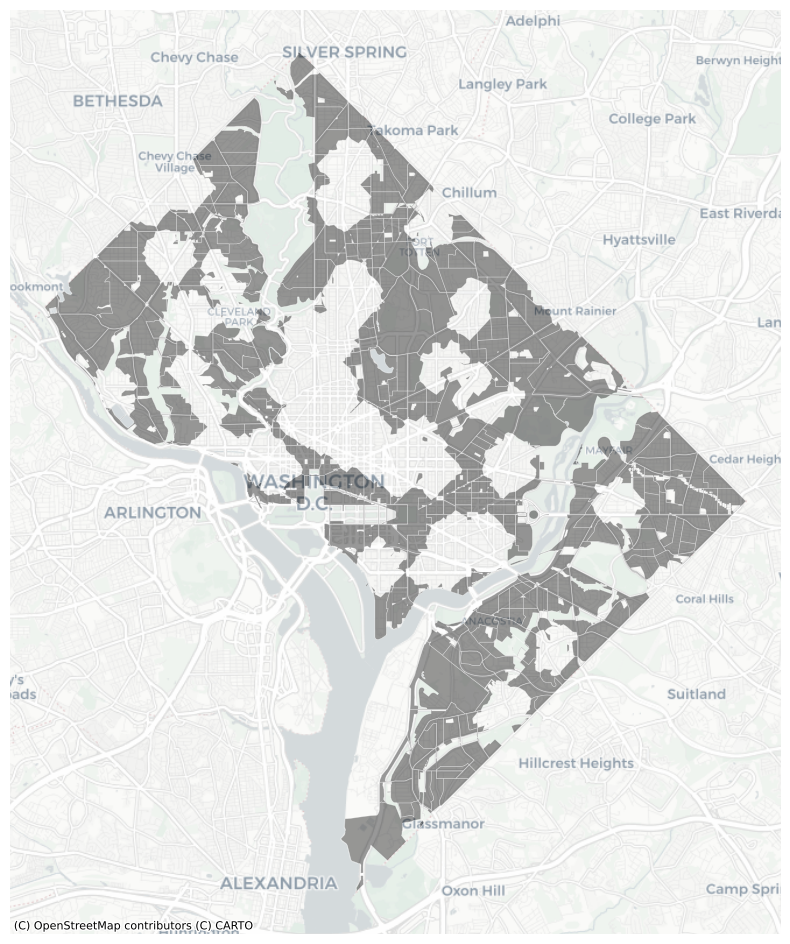

In [32]:
# plot access
fig, ax = plt.subplots(figsize=(12,12))
gdf_access.plot(ax=ax,
                color='black',
                edgecolor='white',
                lw=0.5,
                alpha=0.4)
ax.axis('off')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

Based on this contextual map, it seems like low food access areas are distributed all over DC, indicating that in each ward, there is some likelihood of being in a low food access area, and living further away from a full-service grocery store. Looking closely however at how the polygons are shaded, and we can observe that there is more contiguous shading across the Southeast region. Let's also look at a csv version of the low food access areas dataset to chart food insecurity by ward. We'll conduct the same type of exploration, cleaning, trimming, and renaming as done previously.

In [33]:
# import food access csv data
access = pd.read_csv('datasets/Low_Food_Access_Areas.csv')

In [34]:
access.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       381 non-null    int64  
 1   FID_GROCER     381 non-null    int64  
 2   FID_GROC_1     381 non-null    int64  
 3   FACILITYID     381 non-null    int64  
 4   FID_POV_AC     381 non-null    int64  
 5   GEOID          381 non-null    int64  
 6   FIRST_TOTA     381 non-null    int64  
 7   FIRST_UNDE     381 non-null    int64  
 8   FIRST_OVER     381 non-null    int64  
 9   POPAREA        381 non-null    float64
 10  SHAPE_LENG     381 non-null    float64
 11  PARTPOP        381 non-null    int64  
 12  PARTUNDER1     381 non-null    int64  
 13  PARTOVER18     381 non-null    int64  
 14  PARTAREA       381 non-null    float64
 15  AREARATIO      381 non-null    float64
 16  GROCERYACC     381 non-null    object 
 17  FID_WARDPL     381 non-null    int64  
 18  WARD      

In [35]:
# trim for only necessary columns
access = access[['WARD','PARTPOP2','PRTOVR185','PRTUND185','PERCENTUND185']]

In [36]:
# rename
access.rename(columns={'PARTPOP2':'Total Population',
                       'PRTOVR185':'Income Above FPL',
                       'PRTUND185':'Income Below FPL',
                       'PERCENTUND185':'Percent Food Insecure'                       
                      }, inplace=True)
access.tail(1)# rename

WARD  Total Population  Income Above FPL  Income Below FPL  \
380     8              2171               947              1224   

     Percent Food Insecure  
380               0.563796

Now that I have a cleaned dataset, let's chart percentage of food insecurity by ward.

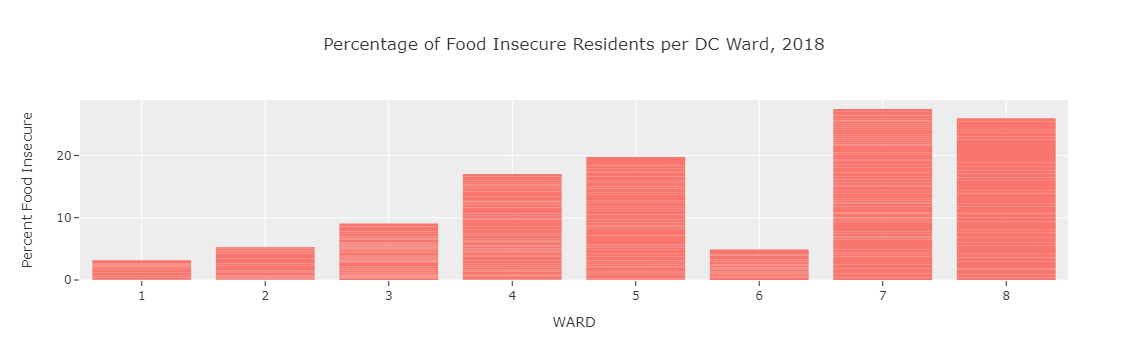

In [37]:
fig = px.bar(access,
             x='WARD',
             y='Percent Food Insecure',
             title='Percentage of Food Insecure Residents per DC Ward, 2018',
             template='ggplot2'
            )
fig.update_traces(marker_line_width=0)
fig.show()

There's a pretty stark contrast in how food insecurity is experienced across ward as well. Wards 1-3 experience the lowest percentage of food insecurity, and based on the information throughout this notebook, we know that these Wards also have the highest number of White residents and have the highest median household income. Wards 7 and 8 have the highest rates of food insecurity, and also have the highest number of Black/African-American residents and the lowest median household income. So far, we can observe that there is some sort of correlation between race/ethnicity (and specifically so between White and Black residents), higher v. lower median household incomes, and experienced food insecurity.